# 泰坦尼克号数据分析报告

## 1. 研究问题

有哪些因素会让船上的人生还率更高？

## 2. 数据整理

首先载入分析所需的python模块，然后将存有数据的csv文件读取为一个pandas Dataframe。

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('titanic_data.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print titanic_df.info()
print titanic_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.

C:\Users\Gaoyuan\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


### 处理缺失值

通过对数据的初步探索发现，该数据集包含12个特征变量和891条记录。各个特征变量在导入时已自动转换为合适的变量格式， 同时未发现明显的outlier。

此外，数据中的有三个特征变量包含缺失值，Age，Cabin和 Embarked，在此根据不同情况分别处理。

Cabin 变量缺失值较多，超过总记录数的3/4， 并且不考虑作为问题分析的相关变量， 因此直接从数据集中删去。

In [4]:
titanic_df = titanic_df.drop('Cabin', axis = 1)

Embarked 为分类变量，且仅有两个缺失值，此处选择用该变量的众数填补。

In [5]:
Embarked_mode = str(titanic_df['Embarked'].mode()[0])
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(Embarked_mode)

Age变量缺失值较多，结合问题分析的其它变量，对所有记录根据Sex,Pclass两个变量的不同取值分组，并以每组记录中Age的中位数填补该组中Age变量的缺失值。

In [6]:
median_ages = titanic_df.groupby(["Sex","Pclass"])["Age"].median()
def fill_Age_na(row):
    if pd.isnull(row["Age"]):
        return median_ages[row["Sex"],row["Pclass"]]
    else:
        return row["Age"]
titanic_df["Age"] = titanic_df.apply(fill_Age_na, axis=1)
titanic_df["Age"].describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

## 2. 数据探索

本研究中以描述乘客是否生还的Survived变量为因变量，并选择乘客年龄（Age）、性别（Sex）、乘客等级（Pclass）、船费（Fare） 和登船港口（Embarked）五个变量作为因变量，探索乘客各属性的分布情况及自变量与因变量间的关系。

首先，观察乘客总体的生还情况。数据集中乘客共计891人,其中549人遇难，342人生还，总体生还率为0.38。


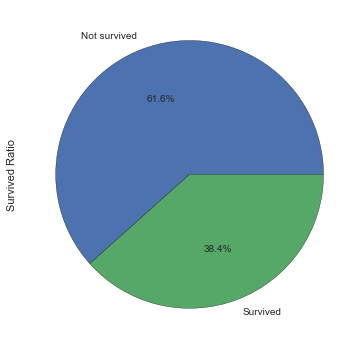

In [7]:
print '首先，观察乘客总体的生还情况。数据集中乘客共计%d人,其中%d人遇难，%d人生还，总体生还率为%0.2f。'%(len(titanic_df), len(titanic_df)-titanic_df['Survived'].sum(), titanic_df['Survived'].sum(),titanic_df['Survived'].mean())
Survived_ratio = titanic_df.groupby('Survived').size()
Survived_ratio.index=['Not survived', 'Survived']
Survived_ratio.name='Survived Ratio'

Survived_ratio.plot(kind = 'pie', figsize=(6, 6), autopct='%.1f%%')

### 性别变量分析

男女乘客人数对比：
Sex
female    314
male      577
Name: Sex Ratio, dtype: int64
男女乘客生还人数对比：
Survived    0    1
Sex               
female     81  233
male      468  109


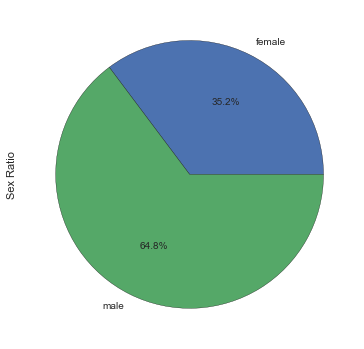

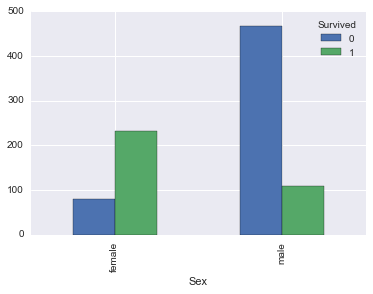

In [8]:
sex_ratio = titanic_df.groupby('Sex').size()
sex_ratio.name = 'Sex Ratio'
print '男女乘客人数对比：'
print sex_ratio
sex_ratio.plot(kind = 'pie', autopct='%.1f%%', figsize=(6, 6))

sex_survived = titanic_df.groupby(['Sex', 'Survived']).size()
#set_index([['female','male'],['Not survived', 'Survived']])
#.column() = ['Not survived', 'Survived']
#sex_survived.index=['Not survived', 'Survived']
print '男女乘客生还人数对比：'
print sex_survived.unstack()
sex_survived.unstack().plot(kind = 'bar')

数据集中，男性人数577人， 女性人数为314， 男女比例约为65比35。
在生还者中，男性人数为109人，女性人数为233人。
而遇难者中，男性人数为468人，女性人数为81人。

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


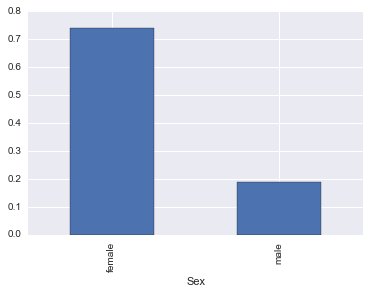

In [9]:
print titanic_df.groupby('Sex').mean()['Survived']
titanic_df.groupby('Sex').mean()['Survived'].plot(kind = 'bar')

对比男女生还率发现，而男性仅为0.188908，女性生还率为0.742038，约为男性的四倍。
可以推断，性别变量的变化会影响乘客生还几率，女性乘客会获得比男性更高的生还率。

### 乘客等级变量分析

各等级乘客人数：
Pclass
1    216
2    184
3    491
dtype: int64
各等级乘客生还与遇难人数：
Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


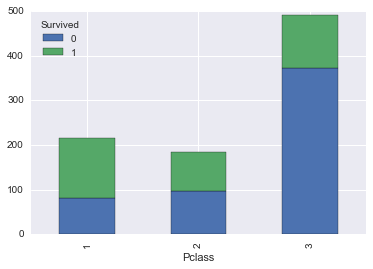

In [10]:
print '各等级乘客人数：'
print titanic_df.groupby('Pclass').size()
print '各等级乘客生还与遇难人数：'
Pclass_survived = titanic_df.groupby(['Pclass', 'Survived']).size()
print Pclass_survived.unstack()
Pclass_survived.unstack().plot(kind = 'bar', stacked = True)

各等级乘客人数分布为：1等：216人，2等：184人，3等：491人。
其中1等舱遇难80人，生还136人。2等舱遇难97人，生还87人。3等舱遇难372人，生还119人。

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


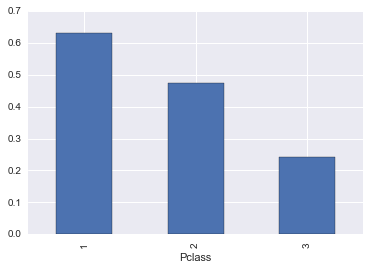

In [11]:
print titanic_df.groupby('Pclass').mean()['Survived']
titanic_df.groupby('Pclass').mean()['Survived'].plot(kind = 'bar')

对比乘客船票等级发现，1等舱生还率为0.629630，二等舱为0.472826，3等舱为0.242363。
两个变量展现出一定的相关关系，即船票等级越高，乘客生还几率越高。

### 年龄变量分析

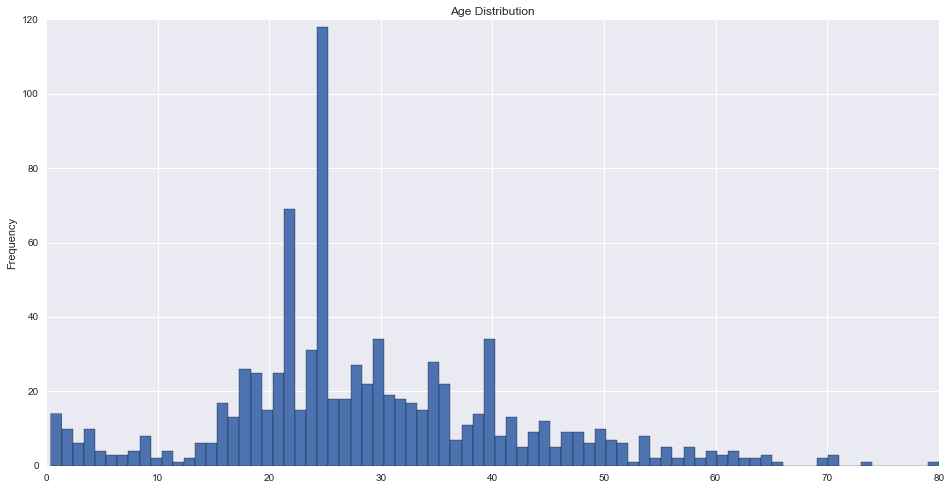

In [12]:
titanic_df['Age'].plot(kind = 'hist',bins = int(titanic_df['Age'].max()),title = 'Age Distribution',figsize=[16,8])

上图展示了数据集中所有乘客的年龄分布情况。考虑到逃生时可能将逃生机会优先让给儿童， 这里将16岁以下的乘客定义为儿童，并根据年龄变量创建boolean变量Is_child, 当 Age < 16时，Is_child 值为 True， 否则为 False。

In [13]:
titanic_df['Is_child'] = titanic_df['Age'] < 16
print '数据集中儿童乘客人数数量为%d人' %titanic_df['Is_child'].sum()

数据集中儿童乘客人数数量为83人


儿童与非儿童乘客生还率对比：


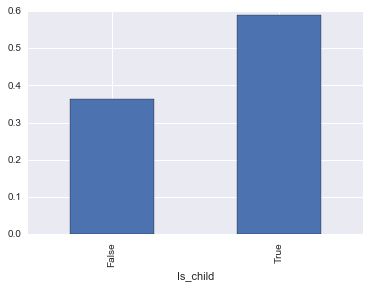

In [14]:
print '儿童与非儿童乘客生还率对比：'
titanic_df.groupby('Is_child').mean()['Survived']
titanic_df.groupby('Is_child').mean()['Survived'].plot(kind = 'bar')

对比儿童与非儿童乘客生还率发现，儿童生还率（约0.59）高于非儿童乘客生还率（约0.36）。

### 票价变量分析

In [15]:
print '生还与遇难乘客票价分布对比：'
titanic_df.groupby('Survived').describe()['Fare'].unstack()

生还与遇难乘客票价分布对比：


,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


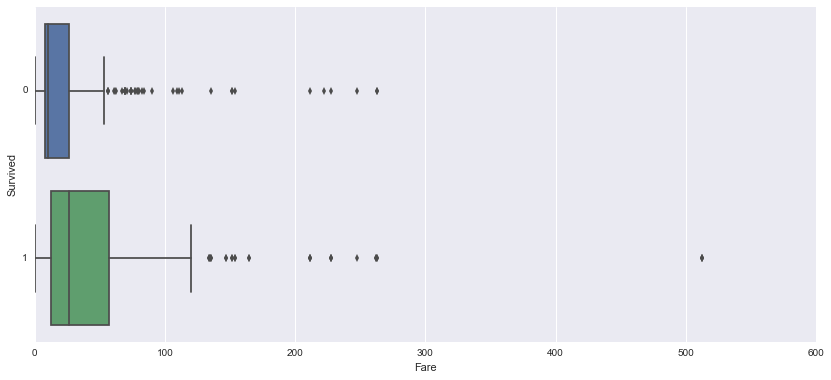

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
sns.boxplot(y='Survived', x = 'Fare', data=titanic_df, orient = 'h')

从乘客票价分布情况来看，生还乘客票价的平均值、最大值以及25%、50%、75%分位数均高于遇难乘客票价的相关指标，因此生还乘客票价整体分布高于遇难乘客。

### 多变量交叉分析

这一部对年龄、性别和乘客等级三个因变量对生还率等影响进行分析。首先根据性别和是否为儿童量变量建立新分类变量Sex_age_group，包含三个取值：儿童（child）、成年男性（adult_male）、成年女性（adult_female）。

In [17]:
titanic_df['Sex_age_group'] = 'adult_male'
titanic_df['Sex_age_group'].loc[titanic_df['Is_child']] = 'child'
titanic_df['Sex_age_group'].loc[(titanic_df['Is_child']== False) & (titanic_df['Sex'] == 'female')] = 'adult_female'

C:\Users\Gaoyuan\Anaconda2\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Sex_age_group,adult_female,adult_male,child
Pclass,,,
1,0.978022,0.352941,0.833333
2,0.909091,0.080808,1.000000
3,0.491228,0.119122,0.431034


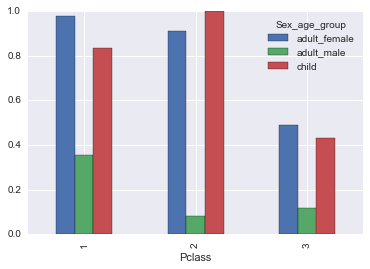

In [18]:
titanic_df.groupby(['Sex_age_group', 'Pclass']).mean()['Survived'].unstack().T.plot(kind = 'bar')
titanic_df.groupby(['Sex_age_group', 'Pclass']).mean()['Survived'].unstack().T

再根据Sex_age_group和Pclass两个变量得出不同年龄、性别和乘客等级群体的生还率。通过对比可以发现，1等舱成年男性和女性乘客生还率均为三个等级中最高的，而儿童生还率最高的为2等舱，达到100%。此外，所有乘客等级中男性乘客的生还率均远低于女性和儿童乘客，其中2等舱乘客中男性生还率最低，且与女性和儿童生还率差距最大。

## 3. 暂时性结论

通过对泰坦尼克号数据集的分析，可以发现所有四个经过探索的变量：性别、年龄、乘客等级和票价的不同取值都会对乘客的生还率产生影响。其中，女性较男性有更高的平均生还率；儿童较成年乘客有较高的平均生还率；乘客等级高的乘客较低等级乘客有较高的平均生还率；最后，生还乘客较遇难乘客所持船票价格分布更高。另外，在对性别、年龄、乘客等级三个变量的交叉分析中，发现各乘客等级中男性乘客的生还率均低于女性和儿童乘客，其中2等舱乘客中男性生还率与女性和儿童差距最大。可能的原因是2等舱乘客在逃生时，更好地执行了“妇女和儿童优先”的原则。
然而，以上差别还需要经过统计验证，才能证明分析中所体现的生还率差异为其它几个变量的变化导致，而非来源于数据的噪声。